In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [86]:
# datasrc = '/Users/bryan/Documents/SeqDataSets/200313/200313s10_100.xls'
# df = pd.read_excel(datasrc)
datasrc = '/Users/bryan/Studio/seq/data/samples/30.csv'
# datasrc = "/Users/bryan/Studio/tools/mix_10.csv"
df = pd.read_csv(datasrc)

In [87]:
topleft = df[df.RT>15]
df = df.drop(topleft.index)

chose 205 cpds from (2051, 24)
[-1.62537550e-07  2.68977812e-03  4.97657998e-01]


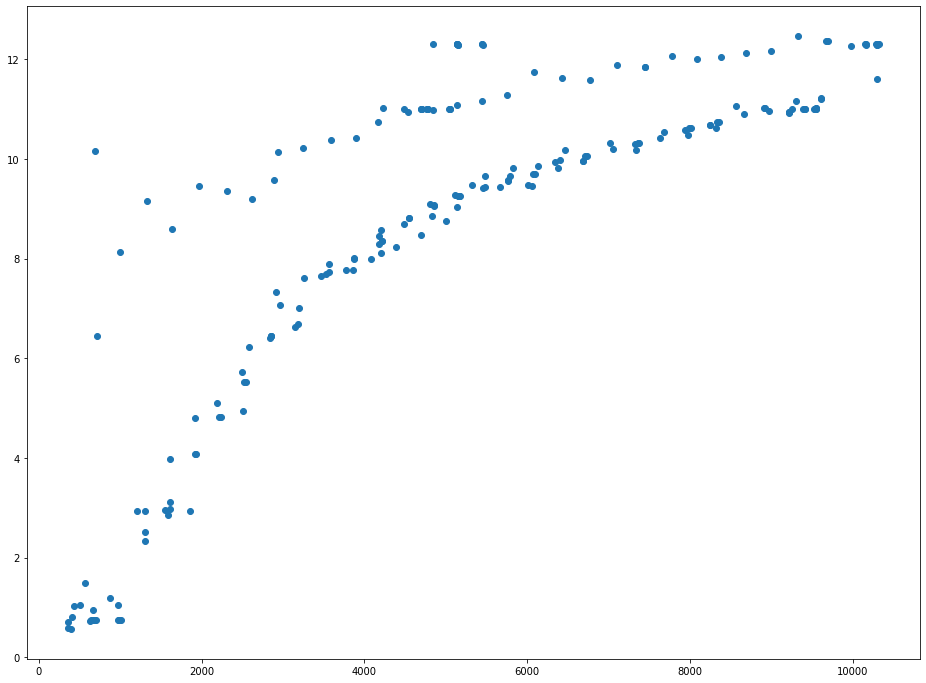

In [88]:
df.dropna(axis=1, inplace=True)
# df = df.drop(df[(df.RT>15) & (df.Mass < 1000)].index)
# df = df.drop(df[df.Vol < 10000].index)
df.sort_values('Vol', ascending=False, inplace=True)
# dftop = df.head(200)
min_N = 200
top_N = int(df.shape[0]/10)
if top_N < min_N:
    top_N = min_N
dftop = df.head(top_N)
x = dftop['Mass']
y = dftop['RT']
z = np.polyfit(x, y, 1)
print("chose {} cpds from {}".format(top_N, df.shape))
plt.figure(figsize=(16, 12))
# plt.scatter(df['Mass'], df['RT'])
plt.scatter(dftop['Mass'], dftop['RT'])
# plt.plot(x, z[0]*x+z[1])

df5p = dftop.sort_values('Mass')
x = df5p['Mass']
y = df5p['RT']
z2 = np.polyfit(x, y, 2)
print(z2)
def f2(x):
    return z2[0]*x*x+z2[1]*x+z2[2]
fx = f2(x)
# plt.scatter(x, y)
# plt.plot(x, fx)

In [ ]:
plt.figure(figsize=(16, 12))
df5p = dftop[dftop.RT < z[0]*dftop.Mass+z[1]]
df5p = df5p.sort_values('Vol', ascending=False)
# df5p = df5p.head(50)
df5p = df5p.sort_values('Mass')
x = df5p['Mass']
y = df5p['RT']
z5 = np.polyfit(x, y, 2)
print(z5)
def f(x):
    return z5[0]*x*x+z5[1]*x+z5[2]#*x+z5[3]
fx = f(x)
plt.scatter(x, y)
plt.plot(x, fx)
print("df5p.shape {}".format(df5p.shape))
df5p.to_csv('data/5p.csv')

df3p.shape (97, 12)
(97, 12)


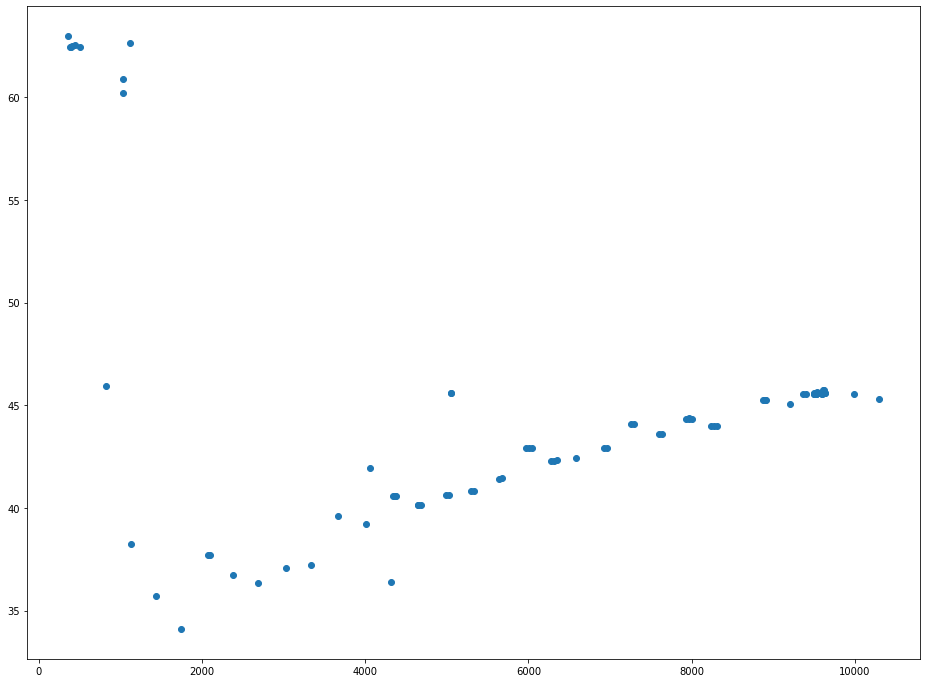

In [844]:
plt.figure(figsize=(16, 12))
df3p = dftop[dftop.RT > z[0]*dftop.Mass+z[1]]
print("df3p.shape {}".format(df3p.shape))
df3p = df3p.sort_values('Vol', ascending=False)
# df3p = df3p.head(200)
df3p = df3p.sort_values('Mass')
plt.scatter(df3p['Mass'], df3p['RT'])
print(df3p.shape)
df3p.to_csv('data/3p.csv')

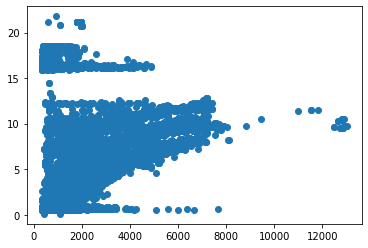

In [12]:
plt.scatter(df['Mass'], df['RT'])

In [846]:
df3p_mass_np = np.array(df3p['Mass'])
df5p_mass_np = np.array(df5p['Mass'])

In [13]:
df3p_mass_np = df5p_mass_np = np.array(dftop['Mass'])

In [14]:
mass_sum_np = df3p_mass_np[:, np.newaxis] + df5p_mass_np
mass_sum_np

array([[12707.7456, 12748.7732, 12790.7086, ...,  7393.1553, 10587.3277,
         6899.8658],
       [12748.7732, 12789.8008, 12831.7362, ...,  7434.1829, 10628.3553,
         6940.8934],
       [12790.7086, 12831.7362, 12873.6716, ...,  7476.1183, 10670.2907,
         6982.8288],
       ...,
       [ 7393.1553,  7434.1829,  7476.1183, ...,  2078.565 ,  5272.7374,
         1585.2755],
       [10587.3277, 10628.3553, 10670.2907, ...,  5272.7374,  8466.9098,
         4779.4479],
       [ 6899.8658,  6940.8934,  6982.8288, ...,  1585.2755,  4779.4479,
         1091.986 ]])

In [15]:
mass_sum_1 = np.round(mass_sum_np, 1)
mass_sum_2 = np.round(mass_sum_np, 2)
mass_sum_3 = np.round(mass_sum_np, 3)

In [16]:
res1 = np.unique(mass_sum_1, return_counts=True)
res2 = np.unique(mass_sum_2, return_counts=True)
res3 = np.unique(mass_sum_3, return_counts=True)

In [17]:
res1_s0 = pd.Series(res1[0])
res1_s1 = pd.Series(res1[1])

res2_s0 = pd.Series(res2[0])
res2_s1 = pd.Series(res2[1])

res3_s0 = pd.Series(res3[0])
res3_s1 = pd.Series(res3[1])

In [18]:
res1_s1_max = np.max(res1_s1)
res1_s2_max = np.max(res2_s1)
res1_s3_max = np.max(res3_s1)
print("max s1 {} s2 {} s3 {}".format(res1_s1_max, res1_s2_max, res1_s3_max))

max s1 1787 s2 1499 s3 608


In [852]:
res1_idxs = res1_s1[res1_s1 > 20].index
res1_s0[res1_idxs]
list(zip(res1_s0[res1_idxs], res1_s1[res1_idxs]))

[(9519.5, 25), (9557.4, 36), (9595.4, 21)]

In [853]:
res2_idxs = res2_s1[res2_s1 > 12].index
list(zip(res2_s0[res2_idxs], res2_s1[res2_idxs]))

[(9519.46, 13), (9557.41, 26), (9595.36, 14)]

In [20]:
sum_value = 6781.1
# sum_value = 9848.4
# sum_value = 8888.3
# sum_value = 9557.4
# sum_value = 7290.1
# sum_value = 7710.1
# sum_value = 7301.2
# sum_value = 8850.4 #9862.5 #6683.1 #9557.4 #7252.2 #8850.4 #7301.2
# sum_value = 10471.6
mass_sum_1[mass_sum_1 == sum_value]

array([6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1,
       6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1, 6781.1])

In [21]:
mass_sum_df = pd.DataFrame(mass_sum_np)
mass_sum_df1 = pd.DataFrame(mass_sum_1)

In [22]:
tmp = mass_sum_df1[mass_sum_df1 == sum_value]
final_idx_pairs = list(tmp[tmp.notnull()].stack().index)
df3_idxs = [pair[0] for pair in final_idx_pairs]
df5_idxs = [pair[1] for pair in final_idx_pairs]
print("df3 idxs {} \ndf5 idxs {}".format(df3_idxs, df5_idxs))

df3 idxs [47, 47, 126, 264, 290, 431, 452, 487, 496, 496, 496, 496, 500, 500, 500, 500, 501, 501, 501, 501, 509, 519, 519, 519, 519, 520, 520, 536, 536, 536, 536, 547, 547, 547, 547, 668, 727, 768, 905, 905, 905, 905, 933, 933, 943, 1062, 1081, 1250, 1289, 1303, 1345, 1345, 1345, 1345, 1487, 1545] 
df5 idxs [1081, 1303, 933, 1487, 727, 943, 768, 1062, 501, 519, 536, 547, 501, 519, 536, 547, 496, 500, 905, 1345, 668, 496, 500, 905, 1345, 1250, 1289, 496, 500, 905, 1345, 496, 500, 905, 1345, 509, 290, 452, 501, 519, 536, 547, 126, 1545, 431, 487, 47, 520, 520, 47, 501, 519, 536, 547, 264, 933]


In [23]:
df3p_mass_np[df3_idxs]

array([6024.8481, 6024.8481, 3807.5559, 5191.8215, 3197.4455, 1941.3606,
       2217.3559, 1635.3358, 6354.8025, 6354.8025, 6354.8025, 6354.8025,
       6354.8676, 6354.8676, 6354.8676, 6354.8676,  426.276 ,  426.276 ,
        426.276 ,  426.276 , 2247.3841,  426.276 ,  426.276 ,  426.276 ,
        426.276 , 6396.8076, 6396.8076,  426.276 ,  426.276 ,  426.276 ,
        426.276 ,  426.2759,  426.2759,  426.2759,  426.2759, 4533.721 ,
       3583.6265, 4563.745 , 6354.8702, 6354.8702, 6354.8702, 6354.8702,
       2973.5474, 2973.5474, 4839.7411, 5145.7622,  756.245 ,  384.2852,
        384.2852,  756.2451, 6354.8285, 6354.8285, 6354.8285, 6354.8285,
       1589.2501, 3807.5523])

In [24]:
df5p_mass_np[df5_idxs]

array([ 756.245 ,  756.2451, 2973.5474, 1589.2501, 3583.6265, 4839.7411,
       4563.745 , 5145.7622,  426.276 ,  426.276 ,  426.276 ,  426.2759,
        426.276 ,  426.276 ,  426.276 ,  426.2759, 6354.8025, 6354.8676,
       6354.8702, 6354.8285, 4533.721 , 6354.8025, 6354.8676, 6354.8702,
       6354.8285,  384.2852,  384.2852, 6354.8025, 6354.8676, 6354.8702,
       6354.8285, 6354.8025, 6354.8676, 6354.8702, 6354.8285, 2247.3841,
       3197.4455, 2217.3559,  426.276 ,  426.276 ,  426.276 ,  426.2759,
       3807.5559, 3807.5523, 1941.3606, 1635.3358, 6024.8481, 6396.8076,
       6396.8076, 6024.8481,  426.276 ,  426.276 ,  426.276 ,  426.2759,
       5191.8215, 2973.5474])

In [28]:
plt.figure(figsize=(16, 12))
df5p_selected = df5p_mass.iloc[df5_idxs]
plt.scatter(df5p_selected['Mass'], df5p_selected['RT'])

x = df5p_selected[df5p_selected.Mass > 1000]['Mass']
y = df5p_selected[df5p_selected.Mass > 1000]['RT']
z5 = np.polyfit(x, y, 2)
print(z5)
def f(x):
    return z5[0]*x*x+z5[1]*x+z5[2]#*x+z5[3]
fx = f(x)
plt.plot(x, fx)
df5p_selected.to_csv('data/5p.csv')

NameError: name 'df5p_mass' is not defined

<Figure size 1152x864 with 0 Axes>

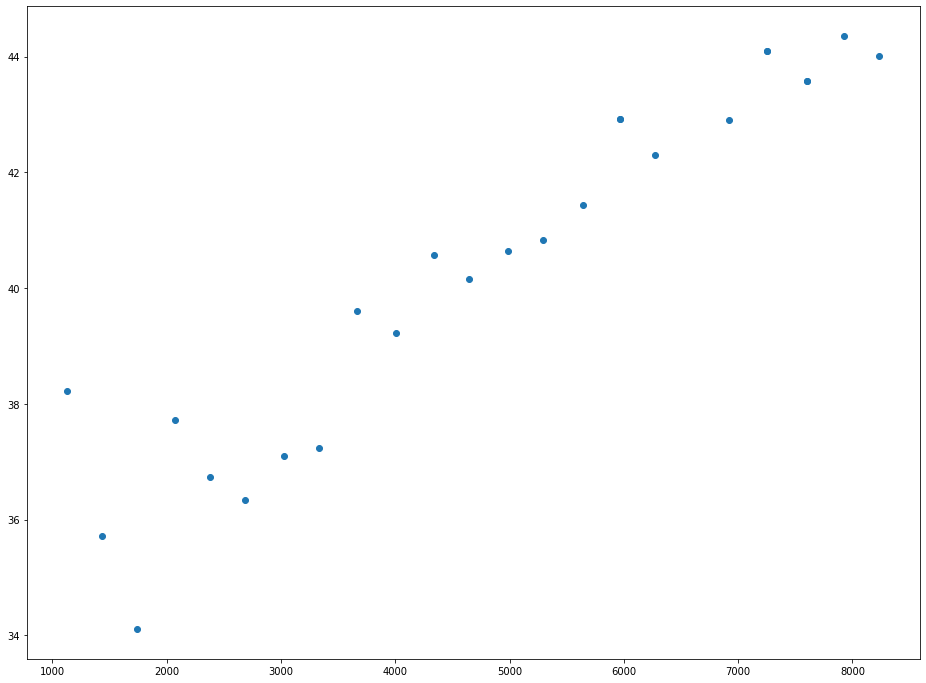

In [840]:
plt.figure(figsize=(16, 12))
plt.scatter(df3p.iloc[df3_idxs]['Mass'], df3p.iloc[df3_idxs]['RT'])
df3p.iloc[df3_idxs].to_csv('data/3p.csv')

In [665]:
print("df3_idxs {} df5_idxs {}".format(len(df3_idxs), len(df5_idxs)))

df3_idxs 41 df5_idxs 41
